<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
transactions = pd.read_csv("transactions.csv", nrows = 1000000)
tr_mcc_codes = pd.read_csv("tr_mcc_codes.csv", sep=";")
tr_types = pd.read_csv("tr_types.csv", sep=";")
gender_train = pd.read_csv("gender_train.csv", sep=";")

In [3]:
tr_mcc_codes

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [4]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
499994,71186181,410 17:22:32,5499,1010,-14845.50,10268176
499995,71186181,411 12:41:25,5814,1110,-3571.01,26021835
499996,71186181,411 18:40:49,6011,2010,-15721.41,51586
499997,71186181,411 19:08:23,5411,1010,-13877.96,696286


In [5]:
gender_train = gender_train.fillna(0)

In [6]:
gender_train.astype("int32")

,customer_id,gender
0,10928546,1
1,69348468,1
2,0,0
3,0,0
4,27979606,1
...,...,...
8395,0,0
8396,0,0
8397,10758984,1
8398,0,0


In [7]:
tr_types

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...
...,...,...
150,2990,Списание по требованию
151,2992,Списание средств для погашения задолженности п...
152,3001,Комиссия за обслуживание ссудного счета
153,3030,Плата за обслуживание банковской карты (за пос...


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [8]:
result = pd.merge(transactions, gender_train, how = "left")
result = pd.merge(result,tr_types, how = "inner")
result = pd.merge(result,tr_mcc_codes, how = "inner")
result2 = result.copy()

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [9]:
males = result["gender"] == 1
males_av = result[males]["amount"].sum()/result[males].shape[0]


In [10]:
females = result["gender"] != 1
females_av = result[females]["amount"].sum()/result[females].shape[0]

In [11]:
np.round(abs(males_av - females_av), 2)

9974.99

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [647]:
result["concat_res"] = result["mcc_code"].astype(str) + result["tr_type"].astype(str)
filter_1 = result["amount"] < 0
result_2 = result.copy()[filter_1]

In [648]:
res = result_2.groupby(['concat_res']).filter(lambda x: len(x) >= 10)

In [649]:
round(res.groupby(['concat_res'])['amount'].agg(['count', 'var']).agg(lambda x: max(x) / min(x))["var"])

5310533.0

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

Максимальная сумма для женщин:

In [658]:
filter_1 = result["amount"] > 0
result3 = result.copy()[filter_1]

filter_fem = result3["gender"] != 1.0
result_fem = result3[filter_fem]
result_fem.groupby(['concat_res']).agg('sum').agg(lambda x: max(x))["amount"]

3028880979.129881

Максимальная сумма для мужчин:

In [659]:
filter_male = result3["gender"] == 1.0
result_male = result3[filter_male]
result_male.groupby(['concat_res']).agg('sum').agg(lambda x: max(x))["amount"]

2851021778.589882

Пять минимальных переводов для каждого гендера:

In [672]:
fem_min = result_fem.groupby(['concat_res']).agg('sum').sort_values("amount")[:5]
male_min =  result_male.groupby(['concat_res']).agg('sum').sort_values("amount")[:5]

In [673]:
male_min.index

Index(['57346200', '35016110', '54116100', '53316110', '57356200'], dtype='object', name='concat_res')

In [674]:
fem_min.index

Index(['57346200', '52311110', '48294071', '73111100', '52516010'], dtype='object', name='concat_res')

Пересечение:

In [675]:
list(set(fem_min.index) & set(male_min.index))

['57346200']

Тип:

In [676]:
result3[result3["concat_res"] =='57346200']["tr_description"]

486908    Возврат  покупки. Зарубеж. ТУ
486909    Возврат  покупки. Зарубеж. ТУ
Name: tr_description, dtype: object

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [618]:
rel_day = result["tr_datetime"].to_frame().applymap( lambda x: x.rsplit(' ', 1)[0])

In [619]:
result4 = result.copy()

In [620]:
result4["tr_day"] = rel_day

In [621]:
result4_f = result4[result4.groupby(['tr_day', 'mcc_code'])['mcc_code'].transform('size')>75]

In [626]:
filter_fem = result4_f["gender"] != 1.0
result4_f_fem = result4_f[filter_fem]

In [627]:
filter_male = result4_f["gender"] == 1.0
result4_f_male = result4_f[filter_male]

In [539]:
result4_f_male.groupby(['mcc_code']).describe()

customer_id                                                     \
               count          mean           std        min         25%   
mcc_code                                                                  
4814         13744.0  5.285258e+07  2.923092e+07   115617.0  24599816.0   
4829          7938.0  4.914461e+07  2.631623e+07   496551.0  21276897.0   
5411         20655.0  5.063910e+07  2.867675e+07   115617.0  28064405.0   
5499            31.0  4.750973e+07  2.557319e+07  8681587.0  32994367.0   
6010         96393.0  6.862435e+07  9.631043e+06   115617.0  70780820.0   
6011         27346.0  5.201366e+07  2.822188e+07   115617.0  26852291.0   

                                              tr_type               ...  \
                 50%         75%         max    count         mean  ...   
mcc_code                                                            ...   
4814      54920864.0  81327243.0  99999680.0  13744.0  1030.921129  ...   
4829      52220754.0  67550128.0  99999680.0   7938.0  2592.569413  ...   
5411      53120025.0  71906343.0  99999680.0  20655.0  1058.679254  ...   
5499      45151678.0  65212150.0  97963238.0     31.0  1026.129032  ...   
6010      70780820.0  70780820.0  99999680.0  96393.0  7051.511811  ...   
6011      52701647.0  75393406.0  99999680.0  27346.0  2851.743509  ...   

            amount                 gender                                     
               75%           max    count mean  std  min  25%  50%  75%  max  
mcc_code                                                                      
4814      -2245.92  1.572141e+04  13744.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
4829     -22459.16  1.756306e+04   7938.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
5411      -3615.92  1.532476e+05  20655.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
5499      -2605.26 -6.738000e+01     31.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
6010      19292.42  1.459845e+08  96393.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
6011      -8759.07  7.433981e+06  27346.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[6 rows x 32 columns]

In [540]:
result4_f_fem.groupby(['mcc_code']).median()

,customer_id,tr_type,amount,gender
mcc_code,,,,
4814,51890036.0,1030.0,-2245.920,NaN
4829,52424807.0,2370.0,-44918.320,NaN
5411,49385418.0,1010.0,-8961.200,NaN
5499,34663092.5,1010.0,-7155.485,NaN
6010,52846368.0,7070.0,69623.390,NaN
6011,53426018.0,2010.0,-22459.160,NaN


In [541]:
result4_f_fem.groupby(['mcc_code']).describe()

customer_id                                                    \
               count          mean           std       min         25%   
mcc_code                                                                 
4814         42328.0  5.067975e+07  2.860918e+07  186730.0  27282344.0   
4829         19505.0  5.020170e+07  2.841742e+07  186730.0  25979685.0   
5411         51200.0  5.026606e+07  2.889277e+07  186730.0  24616822.0   
5499            52.0  4.188176e+07  2.638538e+07  961425.0  25979685.0   
6010         15931.0  5.215226e+07  2.859581e+07  186730.0  28893182.0   
6011         69058.0  5.256765e+07  2.879540e+07  186730.0  29593738.0   

                                              tr_type               ...  \
                 50%         75%         max    count         mean  ...   
mcc_code                                                            ...   
4814      51890036.0  74637057.0  99953525.0  42328.0  1030.997921  ...   
4829      52424807.0  75699831.0  99953525.0  19505.0  2539.105153  ...   
5411      49385418.0  76282911.0  99953525.0  51200.0  1057.158398  ...   
5499      34663092.5  59237719.5  99699527.0     52.0  1033.076923  ...   
6010      52846368.0  77190492.0  99953525.0  15931.0  6810.847969  ...   
6011      53426018.0  78153509.0  99953525.0  69058.0  2838.721118  ...   

               amount              gender                               
                  75%          max  count mean std min 25% 50% 75% max  
mcc_code                                                                
4814       -2245.9200       -13.92    0.0  NaN NaN NaN NaN NaN NaN NaN  
4829      -11229.5800     68545.35    0.0  NaN NaN NaN NaN NaN NaN NaN  
5411       -4210.9775    138797.59    0.0  NaN NaN NaN NaN NaN NaN NaN  
5499       -3483.9800      -336.89    0.0  NaN NaN NaN NaN NaN NaN NaN  
6010      224591.5800  67377473.16    0.0  NaN NaN NaN NaN NaN NaN NaN  
6011       -8759.0700   8983663.09    0.0  NaN NaN NaN NaN NaN NaN NaN  

[6 rows x 32 columns]

In [542]:
result4_f_male.groupby(['mcc_code']).median()

,customer_id,tr_type,amount,gender
mcc_code,,,,
4814,54920864,1030,-4195.145,1.0
4829,52220754,2370,-67377.470,1.0
5411,53120025,1010,-8040.380,1.0
5499,45151678,1010,-6647.910,1.0
6010,70780820,7070,9477.760,1.0
6011,52701647,2010,-42672.400,1.0


In [543]:
1

1

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [544]:
result_5 = result2.copy()

In [546]:
filter_5 = frame[frame.amount<0].amount
 
result_5 ['amount_bucket'] = pd.qcut(filter_5,5,labels=['1','2','3','4','5'])
result_5 ['amount_bucket'] = result_5['amount_bucket'].cat.add_categories('-10').fillna('-10') 
 
hours = result_5['tr_datetime'].apply(lambda x: int(x.split()[1].split(':')[0]))
amount_bucket = result_5['amount_bucket']
amount_bucket = np.array(amount_bucket.values)
gender = result_5['gender']
 
data = {'gender' : gender.values,
        'amount_bucket' : amount_bucket}
 
result_5_1 = pd.DataFrame(data,index=hours.values,columns=['gender','amount_bucket'])
result_5_1.index.name = 'hour'
result_5_1 =result_5_1.replace(np.nan, 0).astype(int) 

In [683]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot = True,  
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

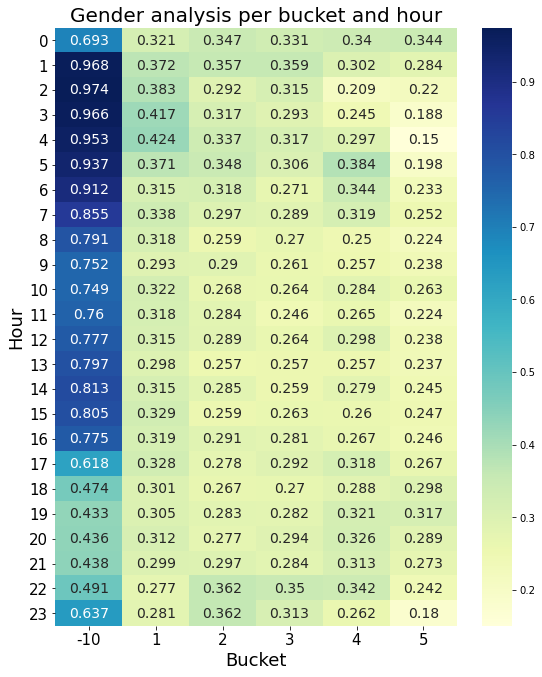

In [685]:
plot_pivot_table(frameNew.fillna(0).pivot_table('gender', index='hour', columns='amount_bucket'))

1. Да.
2. Нет.

3. Да. 

4. Нет.

5. Нет.

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [687]:
days = transactions['tr_datetime'].to_frame().applymap( lambda x: x.rsplit(' ', 1)[0])

In [688]:
transactions["days"] = days

In [689]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,days
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,2
...,...,...,...,...,...,...,...
499994,71186181,410 17:22:32,5499,1010,-14845.50,10268176,410
499995,71186181,411 12:41:25,5814,1110,-3571.01,26021835,411
499996,71186181,411 18:40:49,6011,2010,-15721.41,51586,411
499997,71186181,411 19:08:23,5411,1010,-13877.96,696286,411


In [690]:
tr_f = transactions.groupby(['mcc_code']).filter(lambda x: len(x) >= 60000)

In [692]:
tr_f.groupby(['mcc_code', 'days']).agg('mean')["amount"]

mcc_code  days
5411      0       -17603.742741
          1       -19335.690242
          10      -14057.149381
          100     -25098.495504
          101     -13808.497698
                      ...      
6011      95     -106196.310417
          96      -43794.969091
          97      -57496.518093
          98     -124318.827538
          99      -85965.447982
Name: amount, Length: 1371, dtype: float64

In [693]:
result6 = tr_f.groupby(['mcc_code', 'days']).agg('mean')["amount"].unstack(level=-1)

In [697]:
result6

days,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
mcc_code,,,,,,,,,,,,,,,,,,,,,
5411,-17603.742741,-19335.690242,-14057.149381,-25098.495504,-13808.497698,-12894.472713,-15278.324155,-15549.184050,-23419.761973,-19633.660984,...,-15350.511957,-16980.716803,-21452.037187,-16872.859778,-14680.030863,-14665.544496,-10094.476518,-13808.889035,-17897.257165,-17021.660067
6010,47578.376861,53048.731504,71397.668376,34063.972056,53967.508738,71305.262848,55115.296581,28307.168728,72376.054615,71979.436885,...,43435.376777,90362.126034,32294.649365,20929.382549,48898.354249,43725.767073,164812.750792,44893.856492,121455.288989,99634.006599
6011,-33496.294435,-73367.590321,-33390.059823,-31759.022566,-101931.811822,-142438.487021,-61406.010590,-140558.640297,-91003.678672,-144972.026045,...,-96612.212727,-46487.793785,-66792.877426,-86013.135786,-96376.855701,-106196.310417,-43794.969091,-57496.518093,-124318.827538,-85965.447982


In [711]:
result[result["mcc_code"] == 6010]

KeyboardInterrupt: 

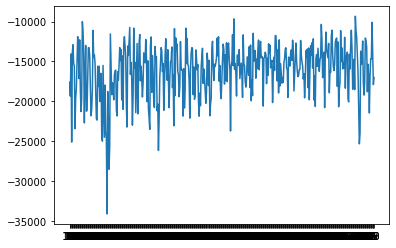

In [694]:
plt.plot(pd.MultiIndex.from_frame(result6[0:1]).names, pd.MultiIndex.from_frame(result6[0:1])[0])

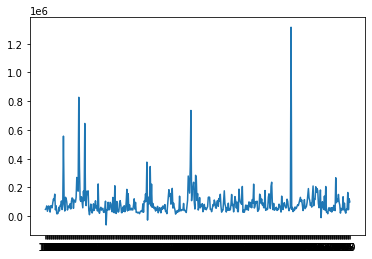

In [695]:
plt.plot(pd.MultiIndex.from_frame(result6[1:2]).names, pd.MultiIndex.from_frame(result6[1:2])[0])

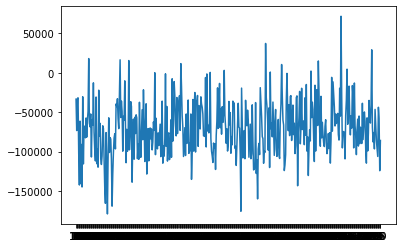

In [696]:
plt.plot(pd.MultiIndex.from_frame(result6[2:3]).names, pd.MultiIndex.from_frame(result6[2:3])[0])

1) 2 из полученных MCC-кодов связаны с финансовыми институтами
- 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
- 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
- 4) Денежные переводы имеют как минимум 3 явных минимума средних
- 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

1. Да.
2. Нет.

In [712]:
result6.groupby(['mcc_code']).describe()

days         0                                                              \
         count          mean std           min           25%           50%   
mcc_code                                                                     
5411       1.0 -17603.742741 NaN -17603.742741 -17603.742741 -17603.742741   
6010       1.0  47578.376861 NaN  47578.376861  47578.376861  47578.376861   
6011       1.0 -33496.294435 NaN -33496.294435 -33496.294435 -33496.294435   

days                                     1                ...             98  \
                   75%           max count          mean  ...            75%   
mcc_code                                                  ...                  
5411     -17603.742741 -17603.742741   1.0 -19335.690242  ...  -17897.257165   
6010      47578.376861  47578.376861   1.0  53048.731504  ...  121455.288989   
6011     -33496.294435 -33496.294435   1.0 -73367.590321  ... -124318.827538   

days                       99                                                \
                    max count          mean std           min           25%   
mcc_code                                                                      
5411      -17897.257165   1.0 -17021.660067 NaN -17021.660067 -17021.660067   
6010      121455.288989   1.0  99634.006599 NaN  99634.006599  99634.006599   
6011     -124318.827538   1.0 -85965.447982 NaN -85965.447982 -85965.447982   

days                                                
                   50%           75%           max  
mcc_code                                            
5411     -17021.660067 -17021.660067 -17021.660067  
6010      99634.006599  99634.006599  99634.006599  
6011     -85965.447982 -85965.447982 -85965.447982  

[3 rows x 3656 columns]